# 21기 Clustering 정규세션 과제

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**데이터:** [Mall Customer Segmentation Data| Kaggle](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

---

## 0. 데이터 불러오기

In [10]:
import pandas as pd
import plotly.figure_factory as ff
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/drive/MyDrive/TOBIGS/5주차/Mall_Customers.csv", index_col = 0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


## 1. Preprocssing / EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [5]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [6]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [7]:
df.corr()

<ipython-input-7-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


In [8]:
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})

corr = df.corr()

heatmap = ff.create_annotated_heatmap(
    z=corr.values,
    x=list(corr.columns),
    y=list(corr.index),
    annotation_text=corr.round(2).values,
    showscale=True,
    colorscale='Viridis'
)

heatmap.show()

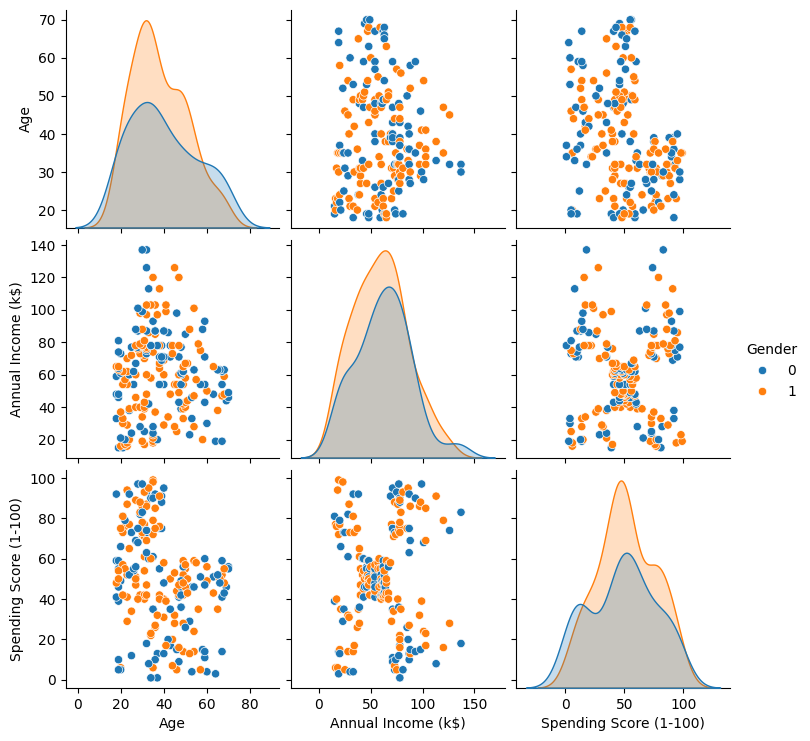

In [11]:
sns.pairplot(df, hue='Gender')

In [12]:
df_drop = df.drop("Gender", axis=1)
columns = df_drop.columns.tolist()

In [13]:
df_drop

,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,
1,19,15,39
2,21,15,81
3,20,16,6
4,23,16,77
5,31,17,40
...,...,...,...
196,35,120,79
197,45,126,28
198,32,126,74


## 2. Clustering

In [14]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9), k=(1, 10))

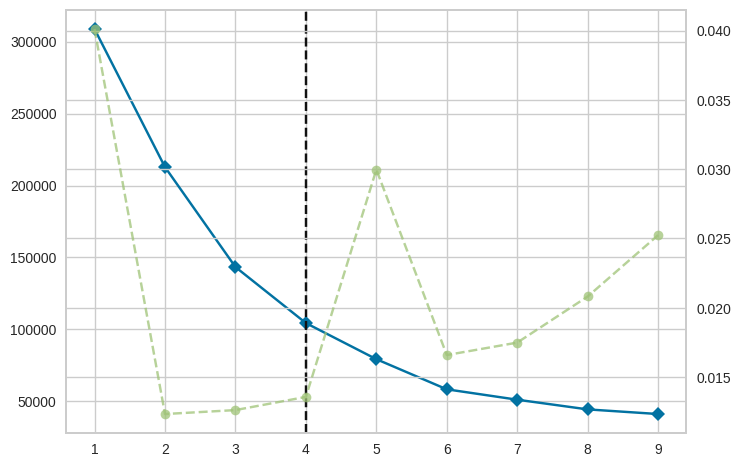

In [15]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(df_drop)

In [16]:
kmeans = KMeans(init="k-means++", n_clusters=4)
kmeans.fit(df_drop)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=4)

In [17]:
import plotly.express as px

df_drop['cluster'] = kmeans.labels_

fig = px.scatter(df_drop, x='Annual Income (k$)', y='Spending Score (1-100)', color='cluster')
fig.show()


In [29]:
fig = px.scatter_3d(df_drop, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)', color='cluster')
fig.show()

## 3. Evaluation

In [35]:
import numpy as np

# 개별 군집의 실루엣 스코어를 계산합니다.
silhouette_vals = silhouette_samples(df_drop, kmeans.labels_)

# 각 군집의 평균 실루엣 스코어를 계산합니다.
silhouette_avg_per_cluster = []
for i in np.unique(kmeans.labels_):
    silhouette_avg_per_cluster.append(silhouette_vals[kmeans.labels_ == i].mean())

print("각 군집의 평균 실루엣 스코어: ", silhouette_avg_per_cluster)

# 전체 실루엣 스코어를 계산합니다.
silhouette_avg = silhouette_score(df_drop, kmeans.labels_)

print("전체 실루엣 스코어: ", silhouette_avg)


각 군집의 평균 실루엣 스코어:  [0.5084312597768655, 0.2894643607227557, 0.43688176535924883, 0.5849370818366623]
전체 실루엣 스코어:  0.4057462140884766
